In [10]:
import glob
import pandas as pd
import numpy as np

# Cleaning

In [2]:
filenames = glob.glob('tesseract_output/*.txt')
output = []
raw_txt = {
    'date':[],
    'members':[],
    'age':[],
    'disabled':[]
}

In [3]:
for file in filenames:
    raw_lines = []

    with open(file, 'r') as f:
        for line in f:
            if 'Processing in' not in line:
                raw_lines.append(line)
                
    # Save each page data in a new list 
    if 'date' in file:
        raw_txt['date'] += raw_lines
    elif 'members' in file:
        raw_txt['members'] += raw_lines
    elif 'age' in file:
        raw_txt['age'] += raw_lines
    elif 'disabled' in file:
        raw_txt['disabled'] += raw_lines


In [4]:
for z in zip(raw_txt['age'], raw_txt['date'], raw_txt['disabled'], raw_txt['members']):
    output.append({
        'date':z[1],
        'members':z[3],
        'age':z[0],
        'disabled':z[2]  
    })

In [5]:
df = pd.DataFrame(output)

In [6]:
df.replace(to_replace='\n', value=' ', regex=True, inplace=True)
df.head()

,age,date,disabled,members
0,40,0510-02011 03:15 PM,No,1
1,54,0511112011 02:31 PM,,1
2,51,051111201 1 02:32 PM,No,1
3,,0511112011 02:32 PM,,1
4,43,0511110011 1:12:32 PM,No,1


In [7]:
df.to_csv('waiting_list.csv')

# Basic analysis

In [20]:
waiting_list_df = pd.read_csv('waiting_list.csv')
waiting_list_df['age'] = pd.to_numeric(waiting_list_df['age'], errors='coerce')

In [25]:
# Naive outliers dropping (OCR issues)
waiting_list_df.loc[waiting_list_df['age'] > 99, 'age'] = np.nan

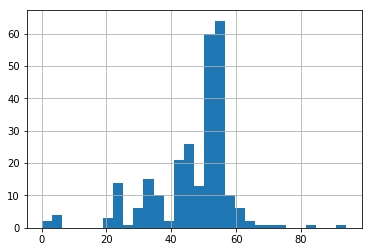

In [29]:
%matplotlib inline
waiting_list_df['age'].hist(bins=30)